# Example 1
This notebook's cells will run a small-scale simulation of methdemon for a tumour evolving via gland fission and visualise the methylation arrays of the glands.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Define relative paths to output files
outputs_path = 'outputs/'
methylation_file = 'output_methylation_arrays.dat'
demes_file = 'output_deme_methylation.dat'

In [3]:
# Uncomment the below three lines and run if methdemon has not been compiled yet
# NOTE: Change the path to the include directory of your boost installation

#!cd ../../src
#!g++ -o methdemon methdemon.cpp -I/usr/local/include/ -lm  
#!cd ../examples/eg1

In [4]:
# Run the example simulation
!../../bin/methdemon ./outputs configfile-eg1.dat

Done reading parameters
max_clones 96000; max_genotypes 96000; max_driver_genotypes 399; max_demes 7225
dim_grid 85; matrix_max -1; max_distinct_allele_freqs 100000
max_clones_per_deme 154; max_bintree_clone_elements_per_deme 85
Assigned memory
dim_grid 85, max_demes 7225, num_demes = 1, init_diameter = 1
clone bintrees in use; max_pop 100000; max_genotypes 96000
Initialised
################################################################

No more cells

dim_grid 85, max_demes 7225, num_demes = 1, init_diameter = 1
clone bintrees in use; max_pop 100000; max_genotypes 96000
Initialised
################################################################

No more cells

dim_grid 85, max_demes 7225, num_demes = 1, init_diameter = 1
clone bintrees in use; max_pop 100000; max_genotypes 96000
Initialised
################################################################

No more cells

dim_grid 85, max_demes 7225, num_demes = 1, init_diameter = 1
clone bintrees in use; max_pop 100000; max_genotype

In [5]:
# Read in the output files
methylation = pd.read_csv(outputs_path + methylation_file, sep='\t')
demes = pd.read_csv(outputs_path + demes_file, sep='\t')
carrying_capacity = demes.Population.max()
filled_demes = demes[demes['Population'] == carrying_capacity]
filled_demes.head()

,Deme,Population,X,Y,AverageArray
25,25,129,39,40,0.50 0.50 0.00 0.00 0.00 0.00 0.50 0.00 0.00 1...


In [6]:
# Separate the demes methylation array strings into lists of floats
deme_arrays = filled_demes.AverageArray.apply(lambda x: [float(i) for i in x.split()])

Text(0.5, 1.0, 'Deme 0 methylation array')

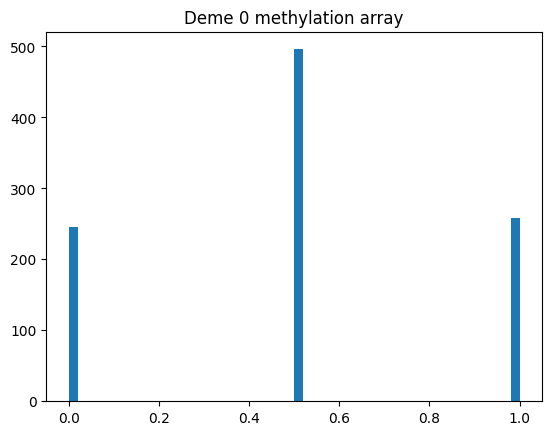

In [17]:
# Plot a randomly selected deme's methylation array
# Randomly select deme to plot
deme = np.random.randint(0, len(deme_arrays))
# Plot the deme's methylation histogram
plt.hist(deme_arrays.iloc[deme], bins=50)
plt.title('Deme ' + str(deme) + ' methylation array')

In [8]:
# Set origin coordinates in the middle of the tumour
xorigin = filled_demes.X.median()
yorigin = filled_demes.Y.median()

In [9]:
# Separate tumour into left and right sides
left_glands = filled_demes[filled_demes['X'] < xorigin].sort_values(by='Y')
right_glands = filled_demes[filled_demes['X'] >= yorigin].sort_values(by='Y')

In [10]:
def select4(glands):
    mid = len(glands) // 2
    if len(glands) % 2 == 0:
        return pd.concat([glands.iloc[mid-2 : mid], glands.iloc[mid : mid+2]])
    else:
        return pd.concat([glands.iloc[mid-2 : mid], glands.iloc[mid+1 : mid+3]])

In [11]:
left_selection = select4(left_glands)
right_selection = select4(right_glands)

In [12]:
left_arrays = left_selection.AverageArray.apply(lambda x: [float(i) for i in x.split()])
right_arrays = right_selection.AverageArray.apply(lambda x: [float(i) for i in x.split()])

In [13]:
# Plot the methylation arrays of the selected demes on the same histogram with left glands being in a blue colour palette and right glands in orange
plt.figure(figsize=(10, 5))
for i in range(len(left_arrays)):
    plt.hist(left_arrays.iloc[i], bins=50, color='blue', alpha=0.5)
    plt.hist(right_arrays.iloc[i], bins=50, color='orange', alpha=0.5)

<Figure size 1000x500 with 0 Axes>

In [14]:
left_arrays = left_arrays.reset_index(drop=True)
right_arrays = right_arrays.reset_index(drop=True)
all_samples = pd.concat([left_arrays, right_arrays], axis=0)

IndexError: single positional indexer is out-of-bounds

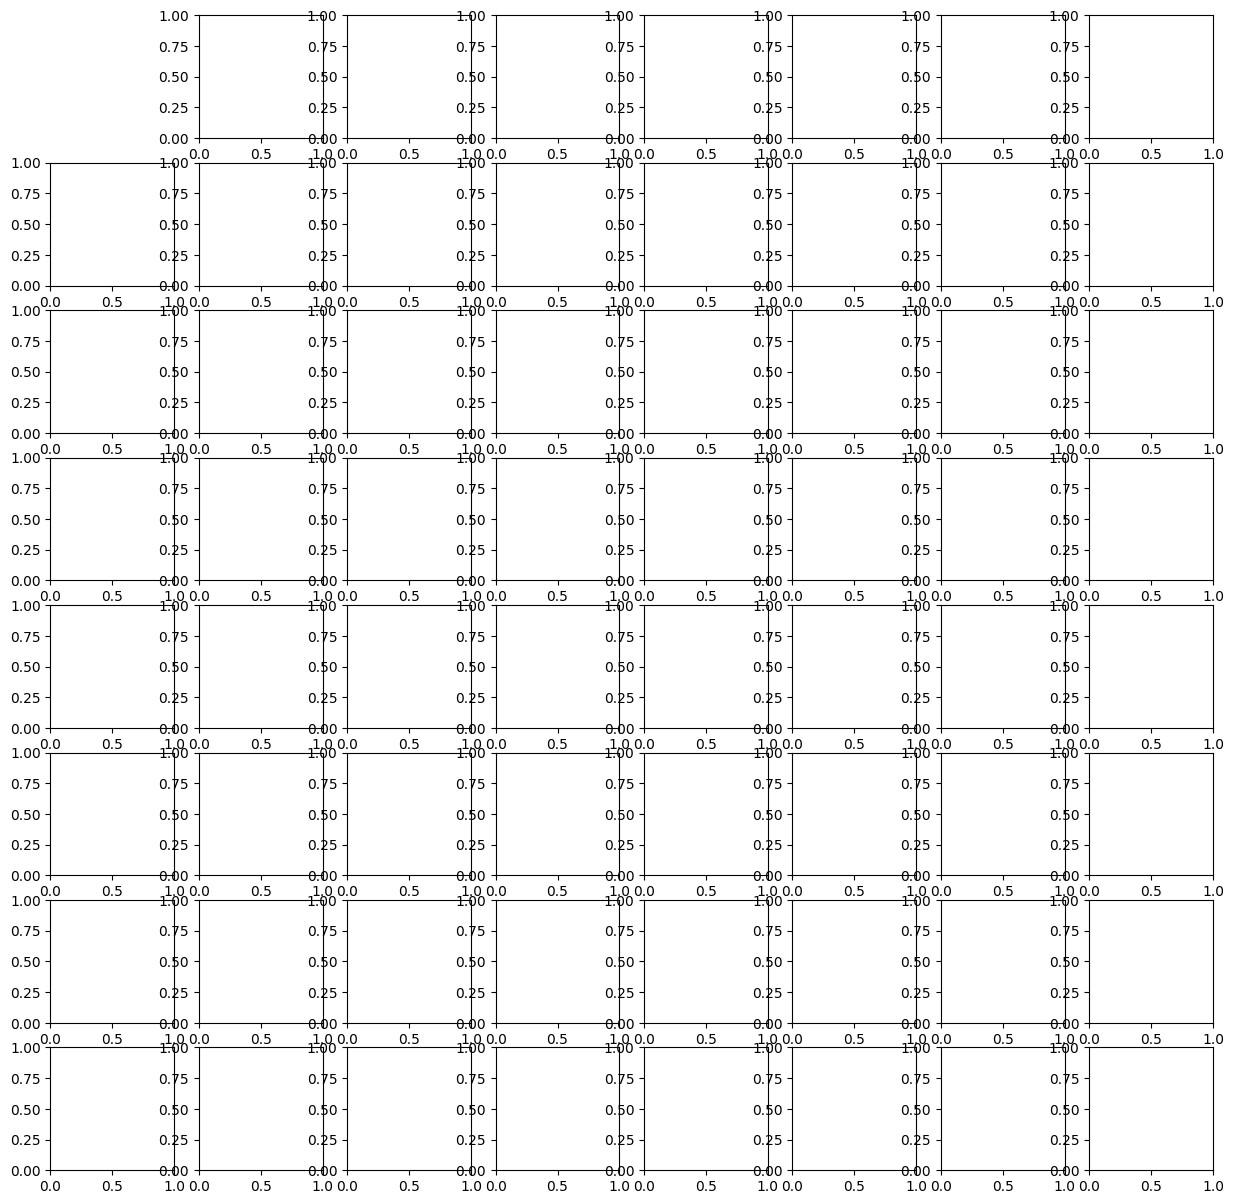

In [15]:
# Correlation plots for each two sampled demes

num_samples = 8
fig, axes = plt.subplots(num_samples, num_samples, figsize=(15, 15))

for i in range(num_samples):
    for j in range(num_samples):
        if j > i:  # We only plot above the diagonal
            sns.scatterplot(data=all_samples, x=all_samples.iloc[i], y=all_samples.iloc[j], ax=axes[i, j])
        else:
            axes[i, j].set_axis_off()  # Turn off axes for other plots

plt.tight_layout()
plt.show()